In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
pf = pd.read_csv("result.csv")
pf.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1.数据可视化基础：

常见的图表类型大致分为六种，柱状图（Bar Chart）、折线图（Line Chart）、饼图（Pie Chart）、散点图（Scatter Chart）、气泡图（Bubble Chart）和雷达图（Radar Chart）。

（1）柱状图是最常见的图表，也最容易解读。它的适用场合是二维数据集（每个数据点包括两个值x和y），但只有一个维度需要比较。柱状图利用柱子的高度，反映数据的差异。肉眼对高度差异很敏感，辨识效果非常好。但柱状图的局限在于只适用中小规模的数据集。

（2）折线图适合二维的大数据集，尤其是那些趋势比单个数据点更重要的场合。它还适合多个二维数据集的比较。

（3）饼图是一种应该避免使用的图表，因为肉眼对面积大小不敏感。一般情况下，总是应该用柱状图替代饼图。但是有一个例外，就是反映某个部分占整体的比重。

（4）散点图，适用于三维数据集，但其中只有两维需要比较。为了识别第三维，通常为每个点加上文字标示，或者不同颜色。

（5）气泡图是散点图的一种变体，通过每个点的面积大小，反映第三维。因为用户不善于判断面积大小，所以气泡图只适用不要求精确辨识第三维的场合。如果为气泡加上不同颜色（或文字标签），气泡图就可用来表达四维数据。

（6）雷达图适用于多维数据（四维以上），且每个维度必须可以排序（国籍就不可以排序）。但是，它有一个局限，就是数据点最多6个，否则无法辨别，因此适用场合有限。面积越大的数据点，就表示越重要。需要注意的时候，用户不熟悉雷达图，解读有困难。使用时尽量加上说明，减轻解读负担。

2.matplotlib的API使用基础：

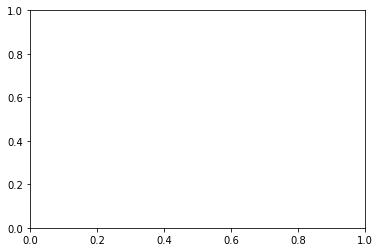

In [16]:
#matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure：
fig = plt.figure()
#图像应该是1×1的（即最多1张图），且当前选中的是所有subplot中的第一个（编号从1开始）
ax = fig.add_subplot(1, 1, 1)

3.pandans和seaborn绘图：

matplotlib实际上是一种比较低级的工具。要绘制一张图表，你组装一些基本组件就行：数据展示（即图表类型：线型图、柱状图、盒形图、散布图、等值线图等）、图例、标题、刻度标签以及其他注解型信息。

在pandas中，我们有多列数据，还有行和列标签。pandas自身就有内置的方法，用于简化从DataFrame和Series绘制图形。另一个库seaborn（https://seaborn.pydata.org/），由Michael Waskom创建的静态图形库。Seaborn简化了许多常见可视类型的创建。

引入seaborn会修改matplotlib默认的颜色方案和绘图类型，以提高可读性和美观度。即使不使用seaborn API，有时可能也会引入seaborn，作为提高美观度和绘制常见matplotlib图形的简化方法。

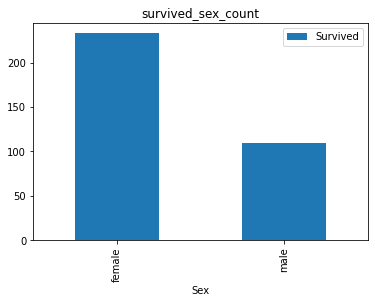

In [22]:
#可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）
survived_sex_count = pf.groupby('Sex')[['Survived']].sum()
#这里的survived_sex_count数据类型为dataframe，Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线型图。
survived_sex_count.plot.bar()
plt.title('survived_sex_count')
#plt.show()

In [36]:
pf.insert(loc=2, column='Number', value=1)
a = pf.groupby('Sex')[['Survived']].sum()
b = pf.groupby('Sex')[['Number']].sum()
survival_sex = pd.concat([a, b], axis = 1)
survival_sex.insert(loc=2, column='Dead', value=0)
survival_sex['Dead'] = survival_sex.apply(lambda x: x['Number'] - x['Survived'], axis=1)
survival_sex.drop('Number',axis = 1,inplace = True)
survival_sex

,Survived,Dead
Sex,,
female,233,81
male,109,468


<AxesSubplot:xlabel='Sex'>

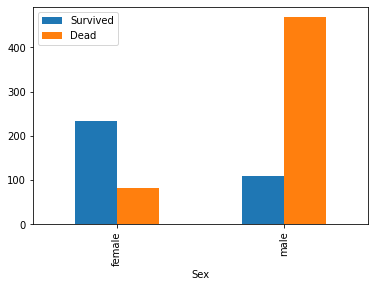

In [37]:
survival_sex.plot.bar()
#看出男性存活人数相较女性少，那么性别可能会影响存活率

Text(0, 0.5, 'count')

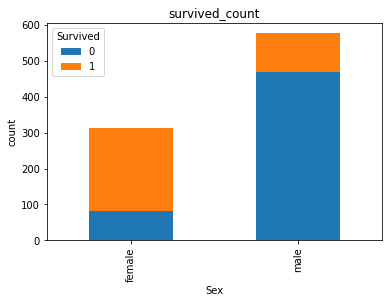

In [39]:
pf.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')
plt.title('survived_count')
plt.ylabel('count')

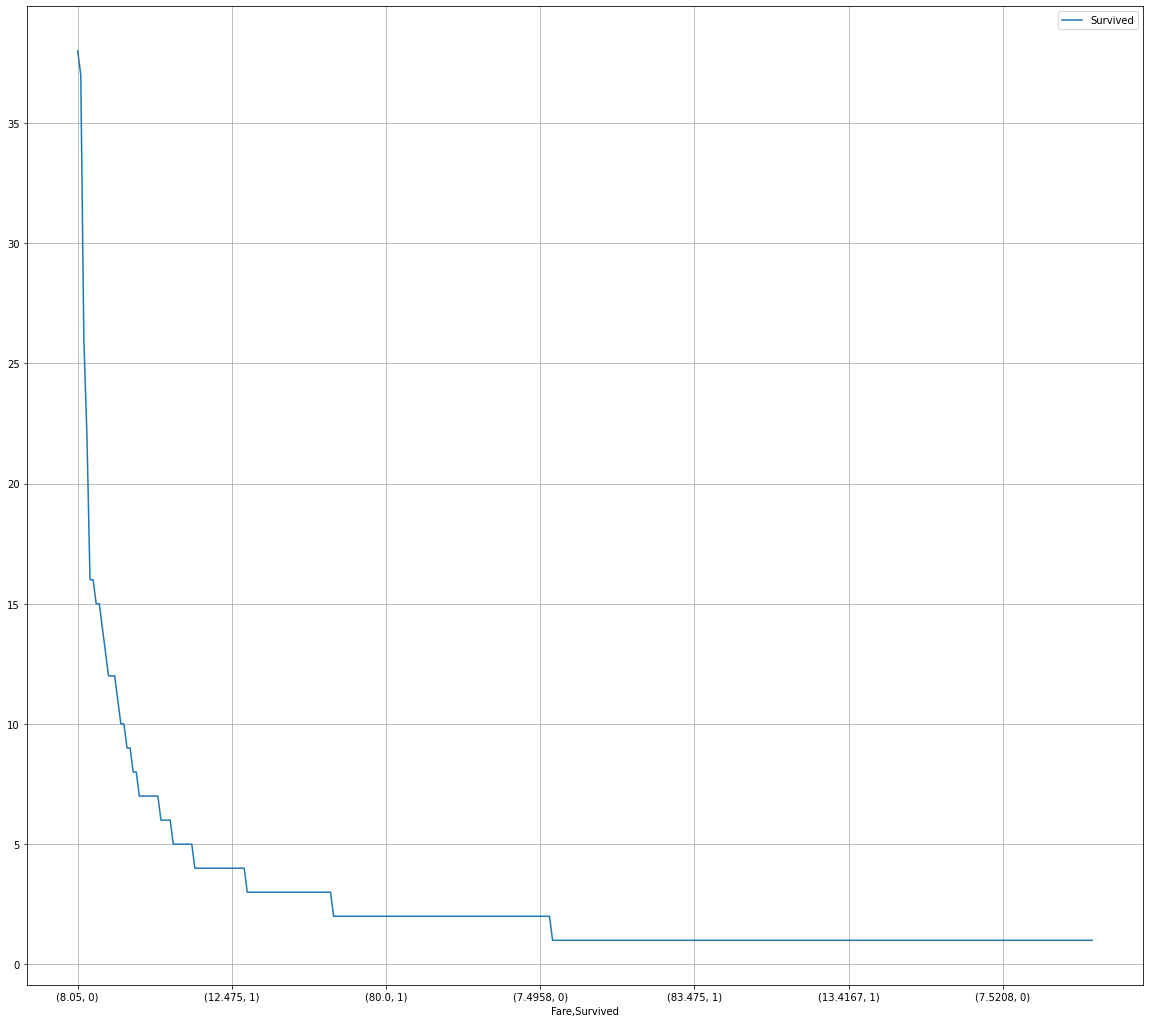

In [53]:
#可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。
fare_sur = pf.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(20, 18))
fare_sur.plot(grid=True)
plt.legend()

Text(0.5, 1.0, 'survived_count')

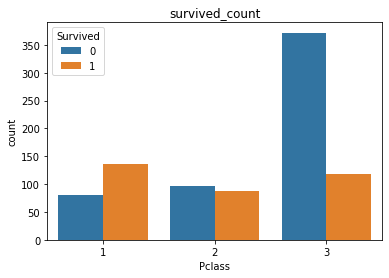

In [52]:
#可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况
pclass_survived = pf.groupby(['Pclass'])['Survived'].value_counts()
sns.countplot(x="Pclass", hue="Survived", data=pf)
plt.title('survived_count')

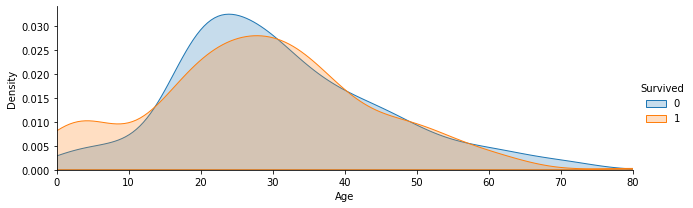

In [51]:
#可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。
facet = sns.FacetGrid(pf, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, pf['Age'].max()))
facet.add_legend()

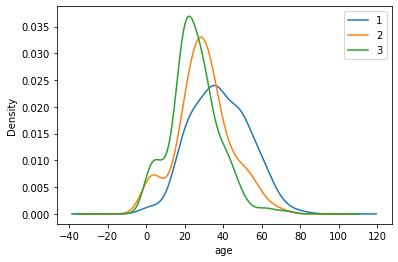

In [48]:
#可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。
pf.Age[pf.Pclass == 1].plot(kind='kde')
pf.Age[pf.Pclass == 2].plot(kind='kde')
pf.Age[pf.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")